# TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

##### Description of the dataset

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = The count of people currently employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

longitude

latitude

##### Importing necessary libraries

In [2]:
# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

###### Loading the dataset

In [6]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


###### Understanding the structure of the dataset

In [7]:

df.shape

(768, 7)

The unemployment dataset contains 267 instances and 9 variables.

##### Renaming the column

In [8]:
df.rename(columns={'Region.1': 'Area'}, inplace=True)

Since we have similar names for two columns we replaced Region.1 with Area which is more concise and clear.

###### Checking for missing values

In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Null values are absent.

###### Checking for duplicate values

In [10]:
df.duplicated().sum()

27

Duplicated values are not present in the dataset.

###### Summary of the dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


We have 5 numerical variables and 4 categorical variables.

Number of non null values in each column is also obtained.

It also provides an estimate of the memory usage of the DataFrame. Here the memory usage is approximately 19 KB.

###### Removing unintentional spaces in columns

In [12]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


We need to ensure that the column names are consistent and free of any unwanted spaces, which can help prevent issues when referencing columns during data analysis.

###### Converting data types

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

Here the column 'Date' was in the object type datatype so we converted it into the datetime format.

###### Summary Statistics

In [14]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat

,count,unique,top,freq
Region,740,28,Andhra Pradesh,28
Frequency,740,2,Monthly,381
Area,740,2,Urban,381


In [15]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,740,2019-12-12 18:36:58.378378496,2019-05-31 00:00:00,2019-08-31 00:00:00,2019-11-30 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,NaN
Estimated Unemployment Rate (%),740.0,11.787946,0.0,4.6575,8.35,15.8875,76.74,10.721298
Estimated Employed,740.0,7204460.025676,49420.0,1190404.5,4744178.5,11275489.5,45777509.0,8087988.429458
Estimated Labour Participation Rate (%),740.0,42.630122,13.33,38.0625,41.16,45.505,72.57,8.111094


The mean estimated unemployment rate is high. The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.

###### Dropping irrelevent column

In [16]:
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


###### Outlier detection

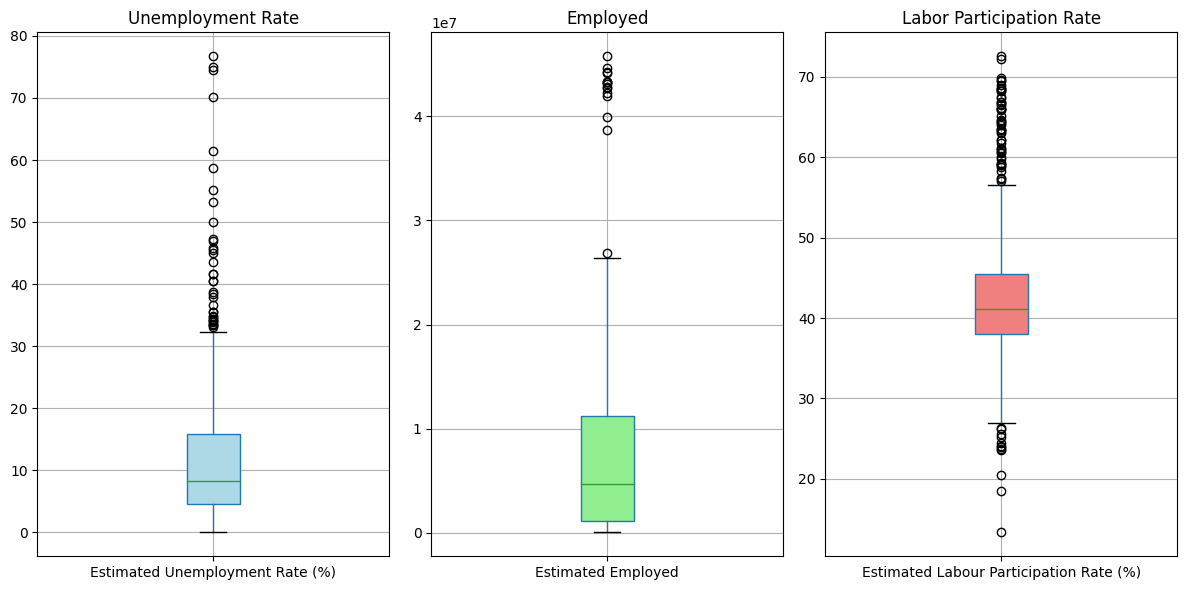

In [17]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

Presence of outliers are detected. Since we are analyzing the unemployment during Covid-19 the extreme values in the data are indicative of genuine structural changes or such events therefore we are not removing it.

###### Correlation plot

If the percentage change is positive (+X%), it means that unemployment has increased by X% compared to the previous period. In other words, more people are unemployed.

If the percentage change is negative (-X%), it means that unemployment has decreased by X% compared to the previous period. Fewer people are unemployed.

The magnitude of the percentage change indicates how significant the change is. A larger percentage change suggests a more substantial shift in unemployment rates compared to a smaller percentage change.

Puducherry's unemployment rate had been seriously impacted by the lock-down.

Sikkim, Chattisgarh, Jammu & Kashmir and Himachal Pradesh have negetive percentage change.That means these states are not highly impacted by the lock down.